##### https://www.kaggle.com/code/nasirislamsujan/bank-customer-churn-prediction/input?select=Churn_Modelling.csv

In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from joblib import dump, load



### Load the dataset

In [3]:
df = pd.read_csv('churn.csv', index_col=0)

### Data Structure

In [4]:
# Checking the first 5 rows
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 13)

In [6]:
# checking datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


###  Data Cleaning

In [7]:
# Checking for missing values in the dataframe

In [8]:
df = df.applymap(lambda x: np.nan if x == 'nan' else x) #Replacing all string NaN values to Np.nan, in case any

In [9]:
#Let's see how much are the missing values from the datset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 0, which is 0.00% of total data.


In [10]:
#Dropping Irrelevant Feature

df.drop(['CustomerId','Surname'], axis = 1, inplace = True)


df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
#select the categorical columns

cat_columns = df.select_dtypes(include = object).columns
cat_columns

Index(['Geography', 'Gender'], dtype='object')

In [12]:
#Check for unique values in the categorical variable

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Geography':
['France' 'Spain' 'Germany']

Value counts for column 'Gender':
['Female' 'Male']



In [13]:
df.duplicated().sum()

0

In [14]:
mixed_types = df.applymap(type).nunique()
print(mixed_types)

CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64


In [15]:

#Negative values : The dataset features can not have negative values, hence let's check for any negative values

num_columns = df.select_dtypes(exclude=['object'])

negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


In [16]:
#check for duplicates

df.duplicated().sum()

0

In [17]:
# Check for mixed types in each column

mixed_types = df.applymap(type).nunique()
print(mixed_types)

CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64


### Statistical summary of the dataset

In [18]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## Data Visualization

### Distribution of the Categorical variable

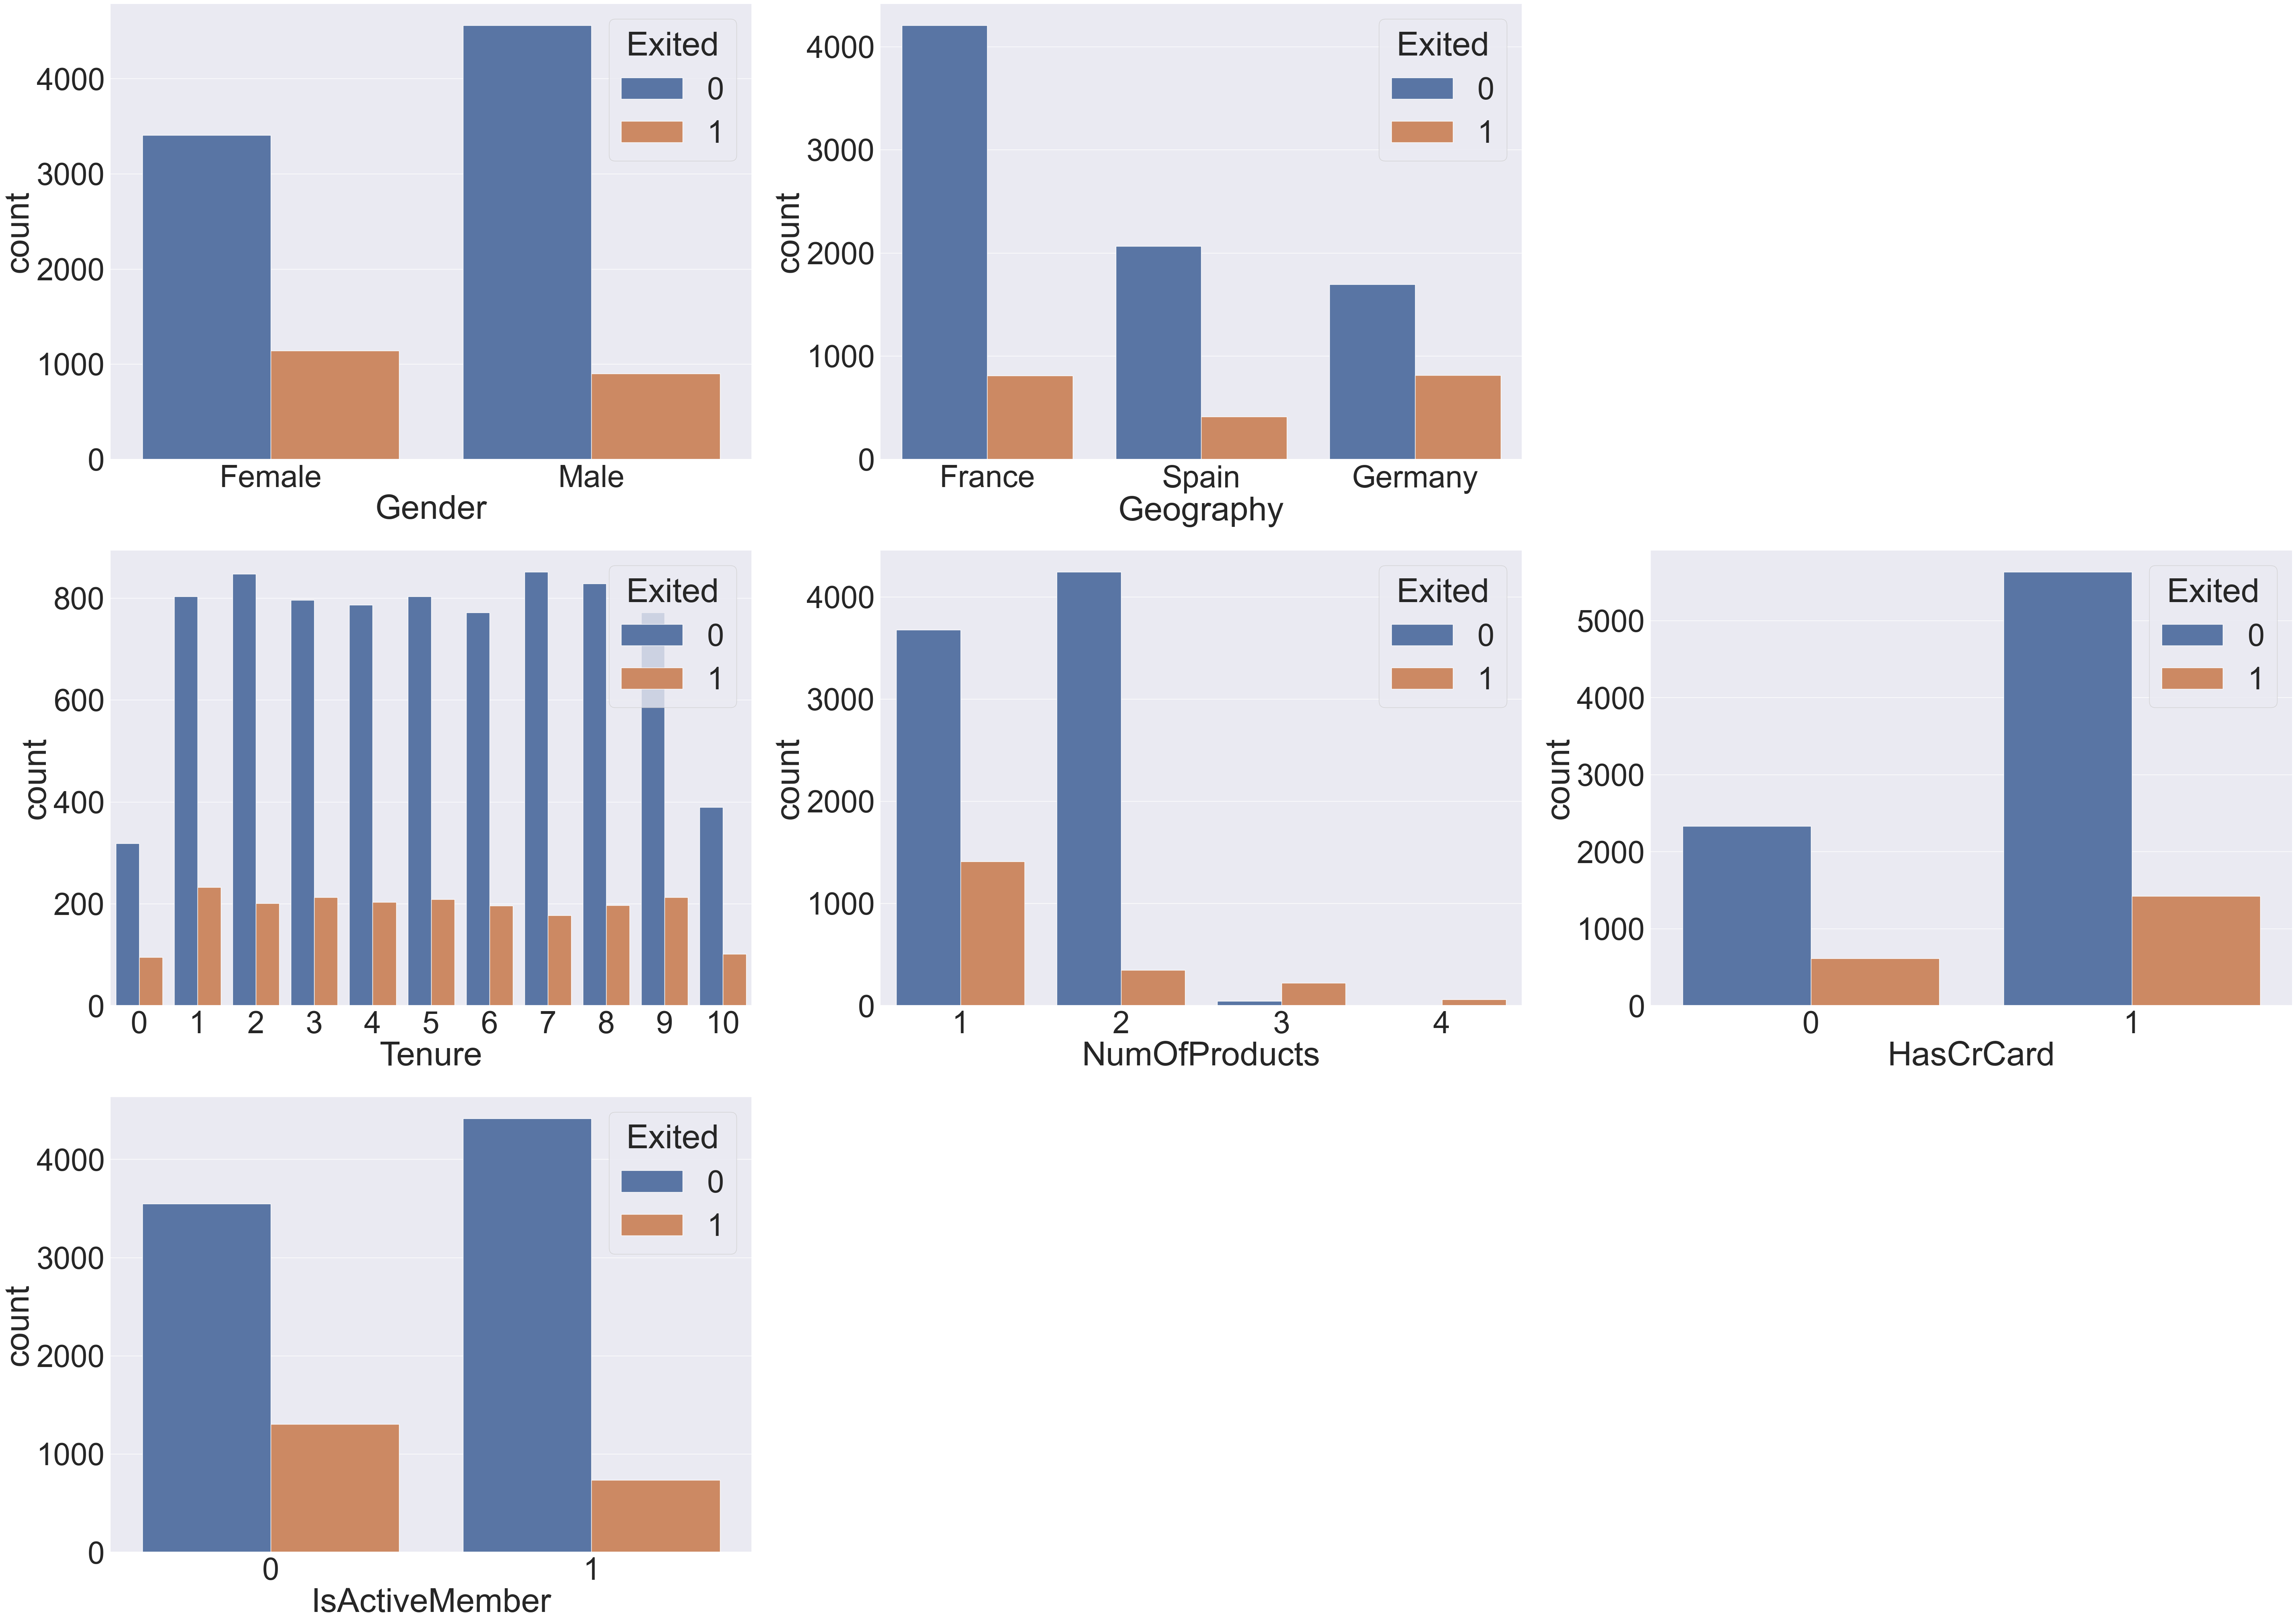

In [20]:
plt.figure(figsize = (70, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df,x=df['Gender'], hue=df['Exited'])

plt.subplot(332)
sns.countplot(df,x=df['Geography'], hue=df['Exited'])

plt.subplot(334)
sns.countplot(df,x=df['Tenure'], hue=df['Exited'])

plt.subplot(335)
sns.countplot(df,x=df['NumOfProducts'], hue=df['Exited'])

plt.subplot(336)
sns.countplot(df,x=df['HasCrCard'], hue=df['Exited'])

plt.subplot(337)
sns.countplot(df,x=df['IsActiveMember'], hue=df['Exited'])



plt.show()

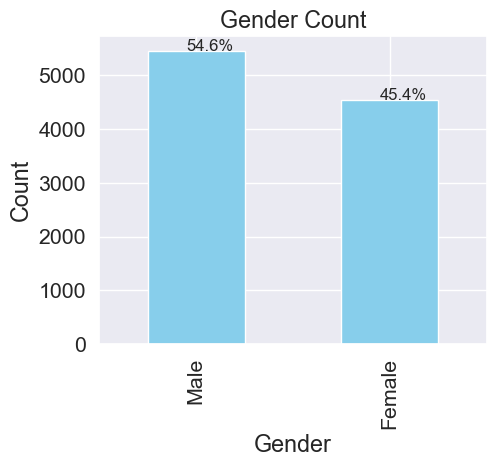

In [21]:
# Set font scale
sns.set(font_scale=1.4)

# Plot gender counts
ax = df["Gender"].value_counts().plot.bar(figsize=(5, 4), color='skyblue')

# Add percentages
total = len(df["Gender"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.1
    ax.annotate(percentage, (x, y), fontsize=12)

plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Gender Count')
plt.show()

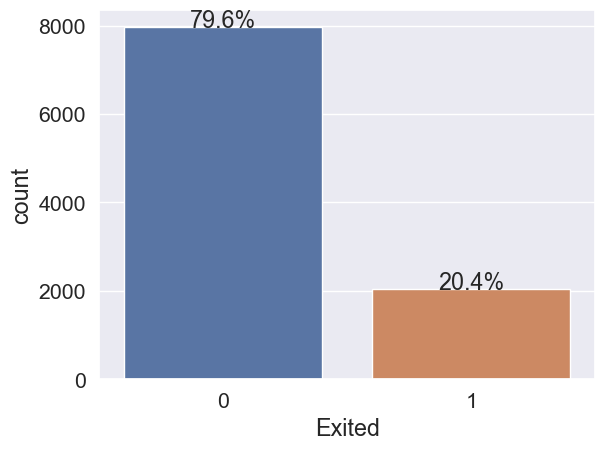

In [22]:
#Plotting the distribution of the Target variable


sns.set(font_scale=1.4)

# Create the countplot
ax = sns.countplot(x='Exited', data=df)

# Calculate percentages
total = len(df['Exited'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.1f}%'.format((height / total) * 100),
            ha="center")

# Show the plot
plt.show()


### Distribution of the Numerical variable

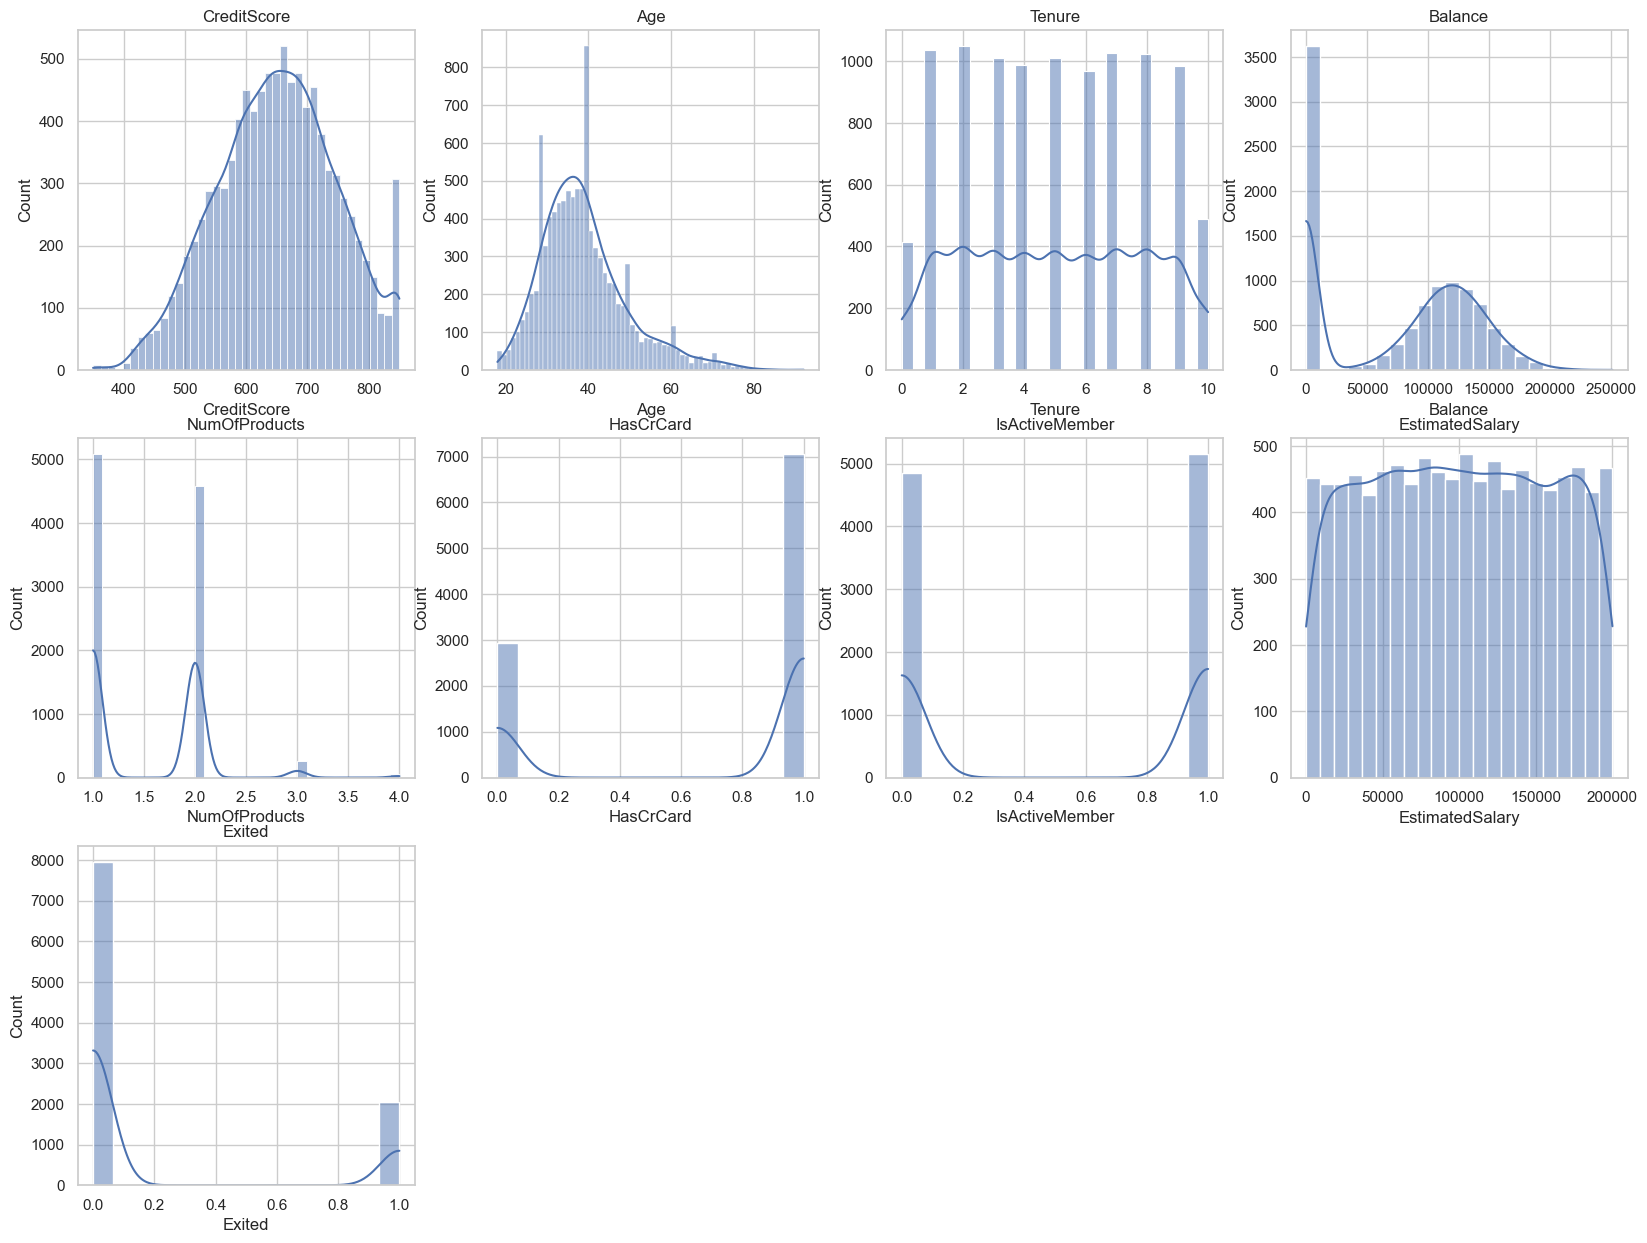

In [23]:
# Distribution plot for each numerical feature
num_columns= df.select_dtypes(exclude=['object'])
sns.set(style="whitegrid")
#num_cols = imputed_df.select_dtypes(include=['int64', 'float64']).columns
num_columns_count = len(num_columns)
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns):
    plt.subplot(3, 4, i % 12 + 1)
    sns.histplot(num_columns[column], kde=True)
    plt.title(column)
    if (i + 1) % 12 == 0 or i == num_columns_count - 1:
        plt.tight_layout()
        plt.show()
        if i != num_columns_count - 1:
            plt.figure(figsize=(20, 15))

### Box plot for the numerical variables

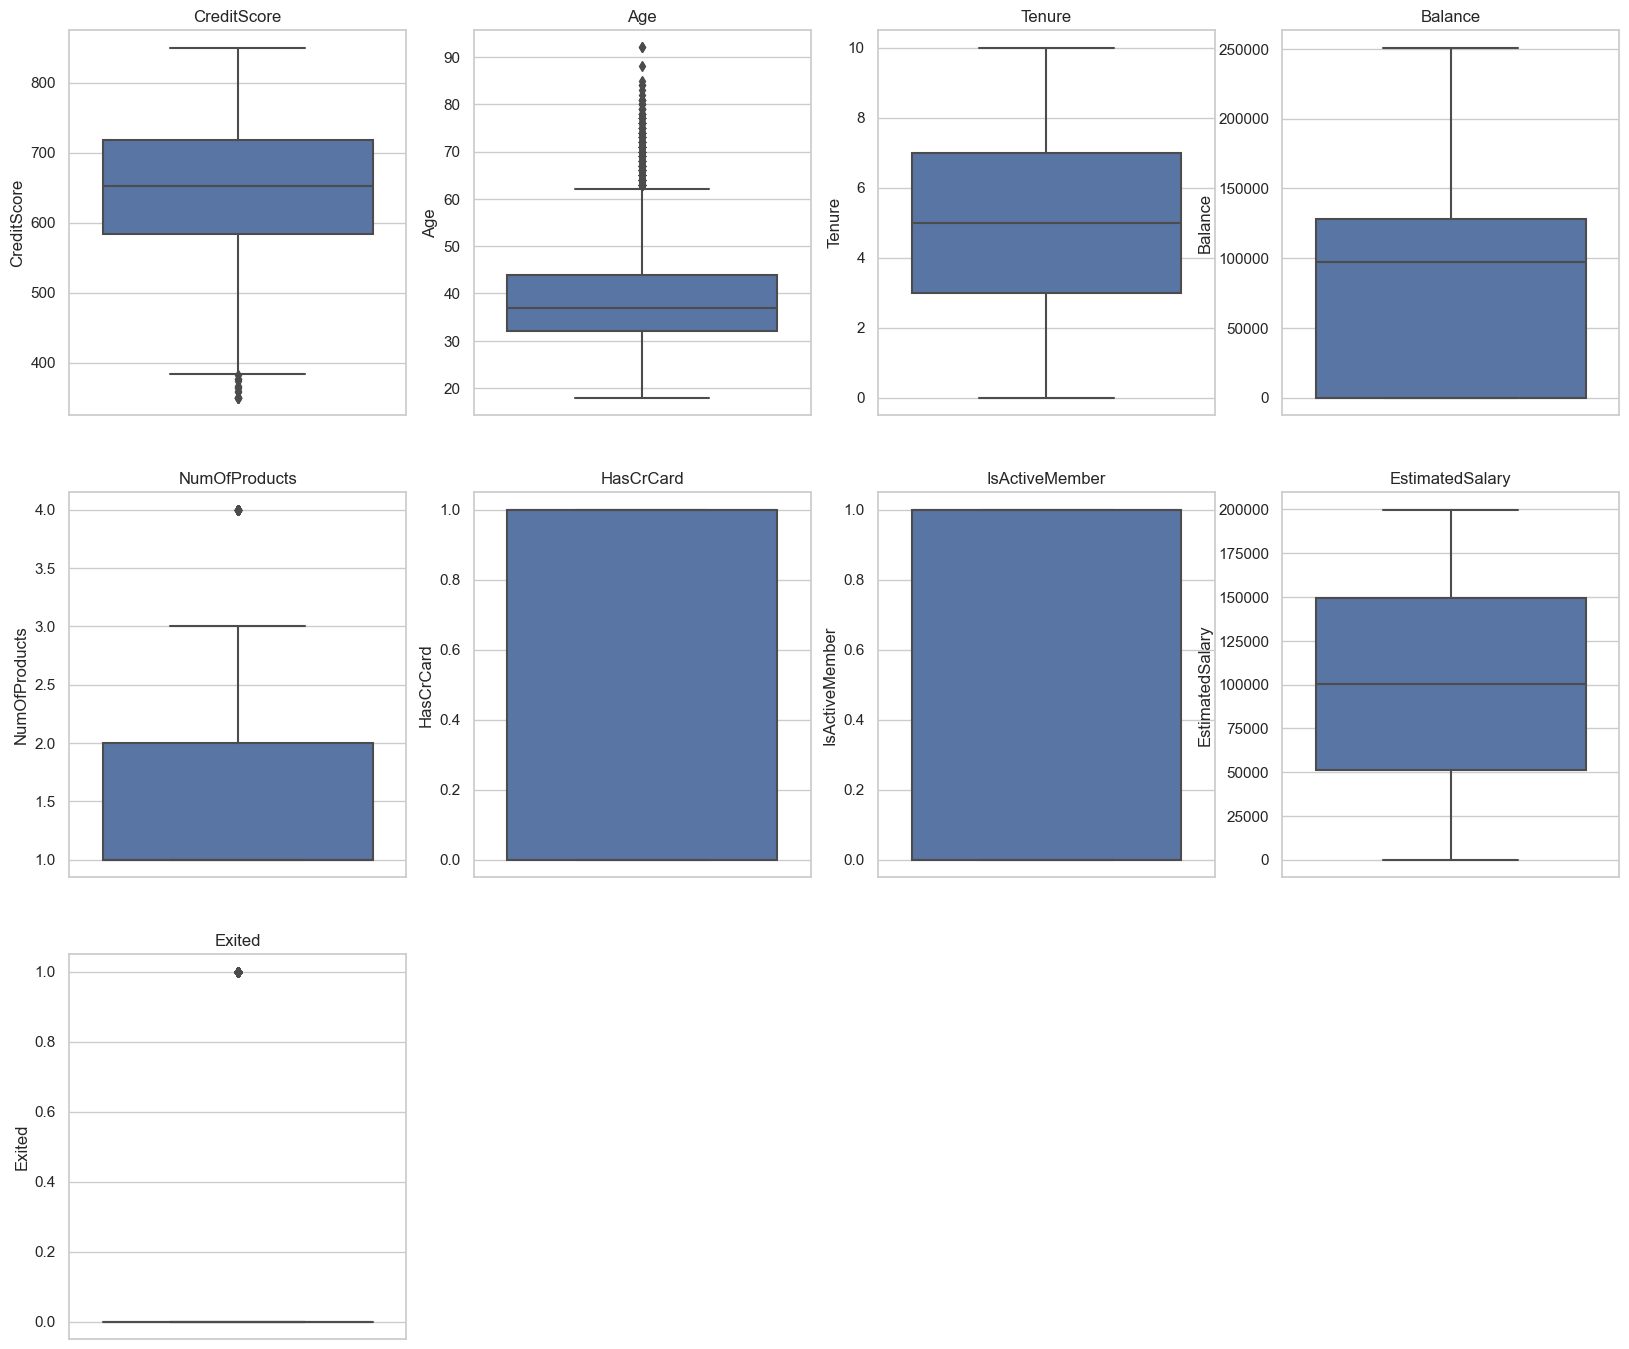

In [24]:

num_columns= df.select_dtypes(exclude=['object'])
plt.figure(figsize=(20, 17))
for i, column in enumerate(num_columns):
    plt.subplot(3, 4, i % 12 + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    if (i + 1) % 12 == 0 or i == num_columns_count - 1:
        plt.tight_layout()
        plt.show()
        if i != num_columns_count - 1:
            plt.figure(figsize=(20, 17))

In [25]:
#Encode the categorical variables 'Geography' and 'Gender'

encoder = LabelEncoder()
df["Geography"] = encoder.fit_transform(df["Geography"])
df["Gender"] = encoder.fit_transform(df["Gender"])

In [26]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Correlation Heatmap

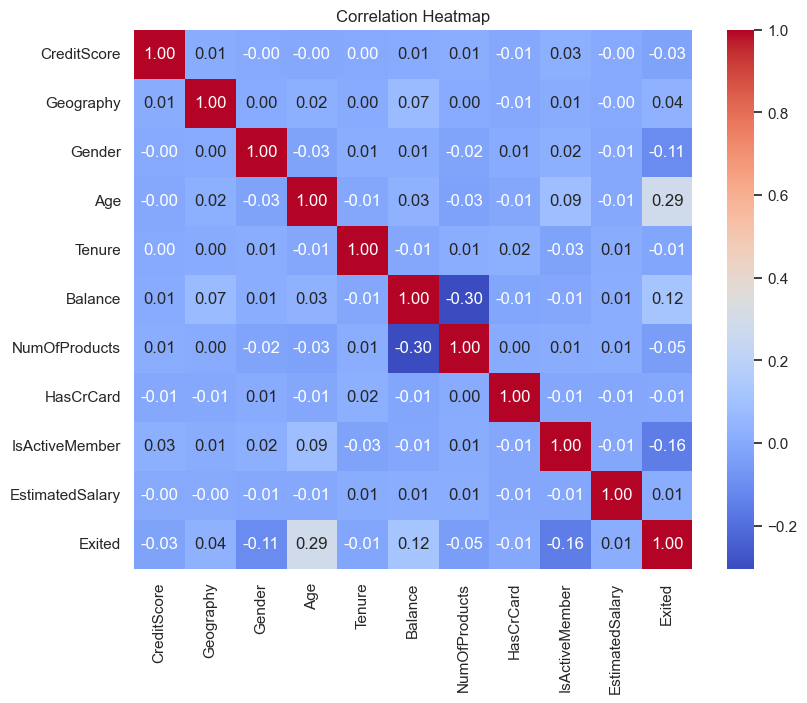

In [27]:
# Plot the Correlation heatmap
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

### Encode the categorical variable using One-hot-Encoder

In [28]:
# The categorical variables have norminal relationship so we used the One-Hot Encoder to avoid introducing bias from rank encoding

In [29]:

# Select categorical columns
cat_columns = df.select_dtypes(include='object').columns.tolist()

# Initialize OneHotEncoder
ce_he = OneHotEncoder(drop='first')  # set drop='first' to drop the first column to avoid multicollinearity

# Encode each categorical column
for cat_col in cat_columns:
    # Reshape the data to fit OneHotEncoder requirement
    data_reshaped = df[cat_col].values.reshape(-1, 1)
    
    # Fit and transform the data
    encoded_data = ce_he.fit_transform(data_reshaped)
    
    # Convert the encoded data to DataFrame
    encoded_df = pd.DataFrame(encoded_data, columns=ce_he.get_feature_names_out())
    
    # Concatenate the encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    
    # Drop the original categorical column
    df.drop(columns=[cat_col], inplace=True)

#### Check the distribution of the Target variable

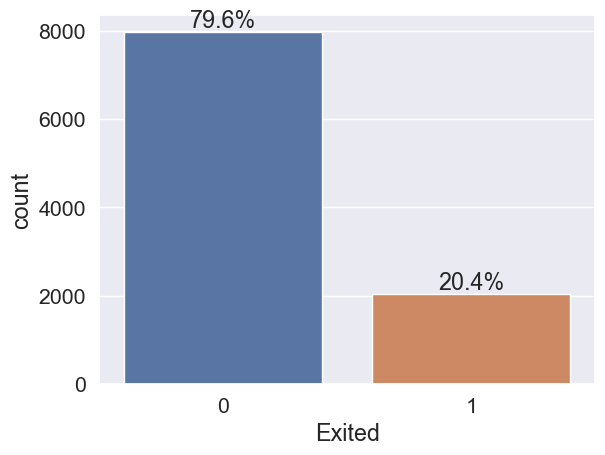

In [30]:
#### Set the font scale for better readability
sns.set(font_scale=1.4)

# Create the countplot
ax = sns.countplot(x='Exited', data=df)

# Calculate and display percentages on the countplot
total = len(df['Exited'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

### Upsample the minority class of the Target variable using SMOTE

In [31]:
# Drop the target variable from the dataframe and assign it to 'X'. Assign the target variable to 'y'

X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to upsample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the upsampled data into training and testing sets, stratifying by the 'Gender' variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=X_resampled['Gender'])



### Plot the distribution of the Target variable after upsampling

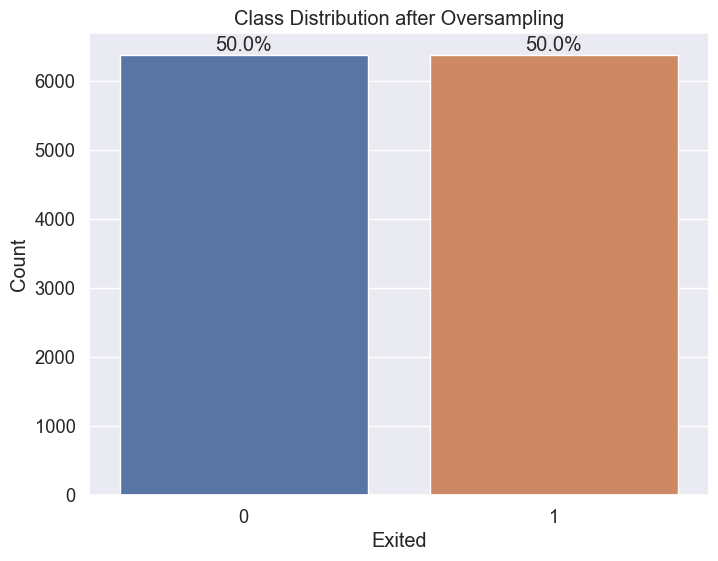

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font scale for better visualization
sns.set(font_scale=1.2)

# Plotting the distribution of classes after oversampling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_train)
plt.title('Class Distribution after Oversampling')
plt.xlabel('Exited')
plt.ylabel('Count')

# Calculate and display percentages on the countplot
total_resampled = len(y_train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_resampled)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Feature Scaling

In [33]:
#Instantiate RobustScaler
robust_scaler = RobustScaler()

#Fit and transform the training data 
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [34]:
#check the structure of the standardized data
print(X_train_scaled.shape,y_train.shape,X_test_scaled.shape)

(12740, 10) (12740,) (3186, 10)


In [35]:
X_train_scaled

array([[ 0.77777778, -1.        ,  0.        , ...,  0.        ,
         0.        , -0.39144914],
       [-0.50793651,  0.        ,  1.        , ...,  0.        ,
         1.        , -0.77225279],
       [-1.1031746 , -1.        ,  1.        , ...,  0.        ,
         1.        ,  0.65422803],
       ...,
       [ 0.12698413, -1.        ,  0.        , ..., -1.        ,
         0.        ,  0.5555528 ],
       [-0.46031746,  0.        ,  0.        , ..., -1.        ,
         0.        , -0.90452119],
       [ 0.69047619, -1.        ,  0.        , ..., -1.        ,
         0.        , -0.31125807]])

In [36]:
# Create an instance of SVC
model = SVC(kernel='linear', probability=True)

# Train the classifier on your data
model.fit(X_train_scaled,y_train)

SVC(kernel='linear', probability=True)

### Evaluate using the testing data

In [37]:
# Make predictions on the test data

predictions = model.predict(X_test_scaled)

# Make predictions on the train data
predictions_train = model.predict(X_train_scaled)


### Print the Accuracy value and check for overfitting

In [38]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)

train_accuracy = accuracy_score(y_train, predictions_train)
print("Training Accuracy:", train_accuracy)

Test Accuracy: 0.761142498430634
Training Accuracy: 0.773861852433281


In [39]:
#PRrint the confusion matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[1198  396]
 [ 365 1227]]


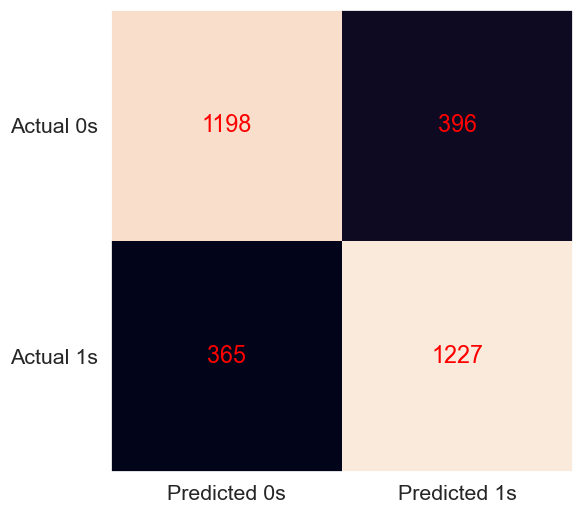

In [40]:
#Plot the chart for confusion matrix

sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(7, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(0,2):
    for j in range(0,2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Print the classification_report

In [41]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1594
           1       0.76      0.77      0.76      1592

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



### Calculate the accuracy, Precision and Recall

In [42]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [43]:
calculated_accuracy = (TP + TN)/ (TP +TN + FP + FN)
calculated_precision = (TP)/(TP + FP)
calculated_recall = (TP)/(TP + FN)
Calculated_positive_rate = (TP+FP)/(TP +TN + FP + FN)

In [44]:
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated Positive rate = ", Calculated_positive_rate)

Calculated accuracy =  0.761142498430634
Calculated precision =  0.756007393715342
Calculated recall =  0.7707286432160804
Calculated Positive rate =  0.5094161958568738


### Ploting ROC curve for the SVM classifier

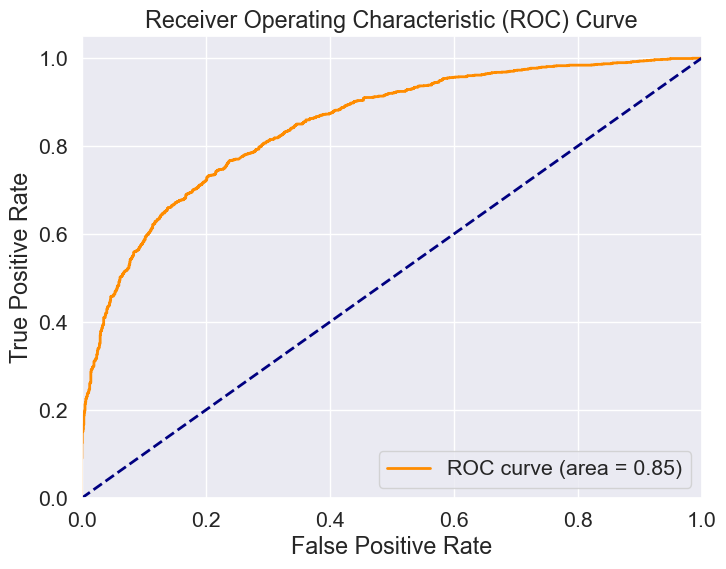

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Split the True and Predicted values into the male and Female groups. Get the indicices for 'Male' and 'Female' from the dataset

In [46]:
PROTECTED = "Gender"
MEN = 1.0 # male
WOMEN = 0.0 # women

In [47]:
#Get the distribution of the gender
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)

0    1879
1    1307
Name: Gender, dtype: int64


In [48]:
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices,"No of Men =", men_indices.size)
print(women_indices,"No of Women =", women_indices.size)

[   0    2    6 ... 3182 3183 3184] No of Men = 1307
[   1    3    4 ... 3180 3181 3185] No of Women = 1879


### Extract the actual and predicted outcomes for the two groups

In [49]:
Y_test_m = [y_test.values[i] for i in men_indices]
Y_test_f = [y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Extract the actual predicted outcomes from the two groups
#### Use the indices to split the predicted values ('predictions') into two groups
#### 'predictions_m' for Male and 'predictions_w' for female

In [50]:
Y_predict_m = [predictions [i] for i in men_indices]
Y_predict_f = [predictions [i] for i in women_indices]
print(Y_predict_m)
print()
print(Y_predict_f)

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

### Compute the confusion matrix for the two groups

#### Confusion matrix for the male group

In [51]:
#Confusion matrix for the male group

cm_protected_male = confusion_matrix(Y_test_m, Y_predict_m)

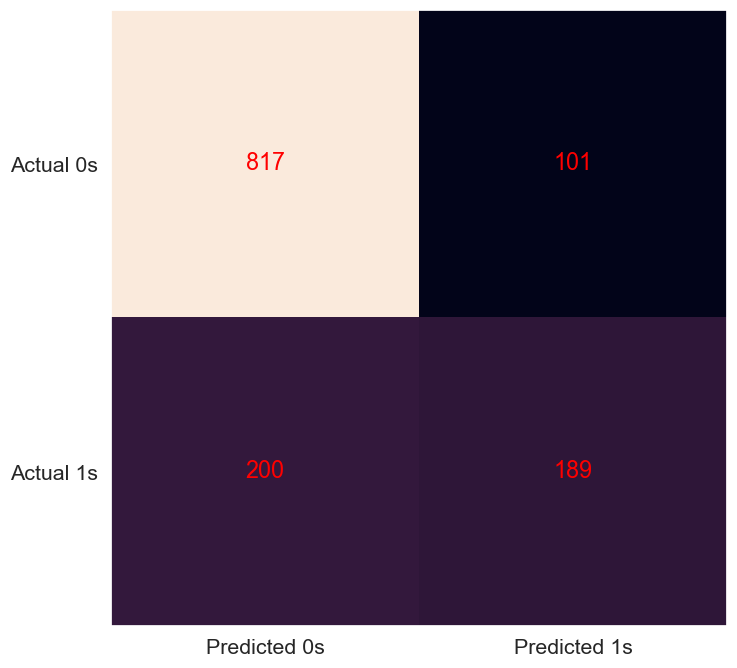

In [52]:
#ploting the confusion matrix for the male group

sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_protected_male)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(0,2):
    for j in range(0,2):
        ax.text(j, i, cm_protected_male[i, j], ha='center', va='center', color='red')
plt.show()

#### print classification report for the male group

In [53]:
print(classification_report(Y_test_m, Y_predict_m))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       918
           1       0.65      0.49      0.56       389

    accuracy                           0.77      1307
   macro avg       0.73      0.69      0.70      1307
weighted avg       0.76      0.77      0.76      1307



### Compute the performnce matrix for Male

In [54]:

TP1 = cm_protected_male[1,1]
TN1 = cm_protected_male[0,0]
FP1 = cm_protected_male[0,1]
FN1 = cm_protected_male[1,0]

In [55]:
# Calculate the accuracy, Precision  Recall and Positive rate for Men

calculated_accuracy_1 = (TP1 + TN1)/ (TP1 +TN1 + FP1 + FN1)
calculated_precision_1 = (TP1)/(TP1 + FP1)
calculated_recall_1 = (TP1)/(TP1 + FN1)
calculated_positive_rate_1 = (TP1 + FP1)/(TP1 +TN1 + FP1 + FN1)

In [56]:
# Print the accuracy, Precision, Recall and Positive rate for Men

print("Calculated accuracy = ", calculated_accuracy_1)
print("Calculated precision = ", calculated_precision_1)
print("Calculated recall = ", calculated_recall_1)
print("Positive rate = ", calculated_positive_rate_1)

Calculated accuracy =  0.7697016067329763
Calculated precision =  0.6517241379310345
Calculated recall =  0.48586118251928023
Positive rate =  0.22188217291507267


### Confusion matrix for the female

In [57]:
cm_protected_female = confusion_matrix(Y_test_f, Y_predict_f)

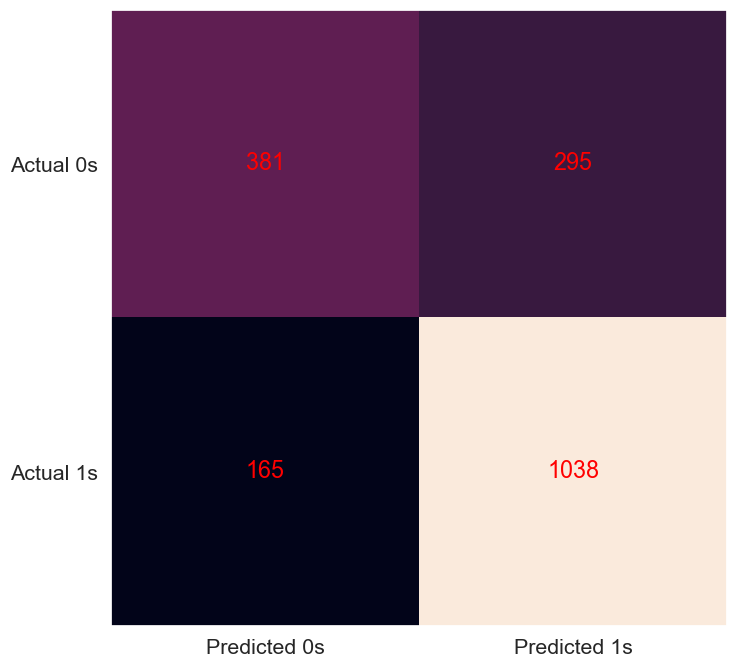

In [58]:
#ploting the confusion matrix for the male group
sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_protected_female)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(0,2):
    for j in range(0,2):
        ax.text(j, i, cm_protected_female[i, j], ha='center', va='center', color='red')
plt.show()

### Print classification report for the female group

In [59]:
print(classification_report(Y_test_f, Y_predict_f))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       676
           1       0.78      0.86      0.82      1203

    accuracy                           0.76      1879
   macro avg       0.74      0.71      0.72      1879
weighted avg       0.75      0.76      0.75      1879



### Compute the performance matrix for the female group

In [60]:

TP0 = cm_protected_female[1,1]
TN0 = cm_protected_female[0,0]
FP0 = cm_protected_female[0,1]
FN0 = cm_protected_female[1,0]

In [61]:
# Calculate the accuracy, Precision, Recall and Positive rate for female

calculated_accuracy_0 = (TP0 + TN0)/ (TP0 +TN0 + FP0 + FN0)
calculated_precision_0 = (TP0)/(TP0 + FP0)
calculated_recall_0 = (TP0)/(TP0 + FN0)
calculated_positive_rate_0 = (TP0 + FP0)/(TP0 + TN0 + FP0 + FN0)


In [62]:
# Print the accuracy, Precision, Recall and Positive rate for female

print("Calculated accuracy = ", calculated_accuracy_0)
print("Calculated precision = ", calculated_precision_0)
print("Calculated recall = ", calculated_recall_0)
print("Calculated Positive rate = ", calculated_positive_rate_0)

Calculated accuracy =  0.7551889302820649
Calculated precision =  0.7786946736684172
Calculated recall =  0.8628428927680798
Calculated Positive rate =  0.7094199042043641


### Save the model into a file using the joblib package


In [63]:
dump(model,'SVM_churn_test.joblib')

['SVM_churn_test.joblib']

In [64]:
model_from_file = load('SVM_churn_test.joblib')